# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 592
['hanover', 'ribeira grande', 'adamstown', 'portland', 'grytviken', 'bilibino', 'waitangi', 'keflavik', 'kodiak', 'tiksi', 'port mathurin', 'nasiriyah', 'san antonio de pale', 'kuta', 'olonkinbyen', 'puerto san carlos', 'nadym', 'mount isa', 'toga village', 'barra do bugres', 'midvagur', 'port-aux-francais', 'teius', "kapa'a", 'rongelap', 'grand-bassam', 'port alfred', 'harlingen', 'coronel dorrego', 'hawaiian paradise park', 'edinburgh of the seven seas', 'palmas', 'zemio', 'palu', 'puerto baquerizo moreno', 'bredasdorp', 'yagry', 'talnakh', 'ancud', 'galliano', 'wailua homesteads', 'papatowai', 'anadyr', 'cambria', 'xiva', 'punta arenas', 'poronaysk', 'akureyri', 'siuna', 'hirara', "nal'chik", 'fale old settlement', 'krasnyy kholm', 'vila franca do campo', 'lethem', 'betio village', 'bayan nur', 'tralee', 'georgetown', 'coquimbo', 'enewetak', 'hermanus', 'rasht', "la'ie", 'mgandu', 'chulym', 'nizhneudinsk', 'katsuren-haebaru', 'bethel', 'kenai', 'bla

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" + city
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        #['weather'][0]['description']   per Diego, BCS assistant

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hanover
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | nasiriyah
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | kuta
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | nadym
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | toga village
City not found. Skipping...
Processing Record 20 of Set 1 | barra do bugres
Processing Record 21 of Set 1 | midva

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hanover,52.3705,9.7332,18.83,92,75,7.72,DE,1691264530
1,ribeira grande,38.5167,-28.7000,23.76,78,75,3.13,PT,1691264531
2,adamstown,-25.0660,-130.1015,19.62,64,21,7.29,PN,1691264263
3,portland,45.5234,-122.6762,28.12,63,75,1.54,US,1691264359
4,grytviken,-54.2811,-36.5092,-5.11,83,100,4.98,GS,1691264531


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hanover,52.3705,9.7332,18.83,92,75,7.72,DE,1691264530
1,ribeira grande,38.5167,-28.7000,23.76,78,75,3.13,PT,1691264531
2,adamstown,-25.0660,-130.1015,19.62,64,21,7.29,PN,1691264263
3,portland,45.5234,-122.6762,28.12,63,75,1.54,US,1691264359
4,grytviken,-54.2811,-36.5092,-5.11,83,100,4.98,GS,1691264531


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

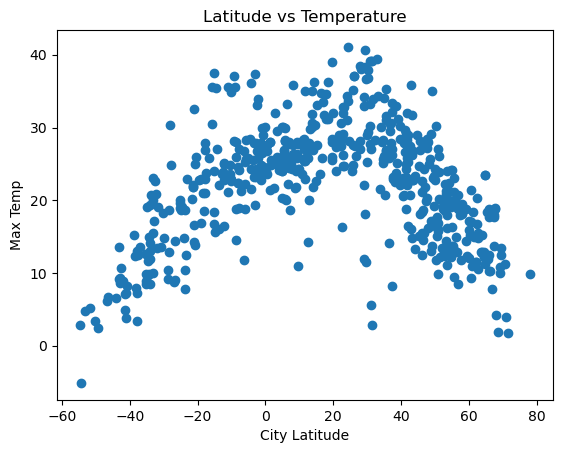

In [15]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

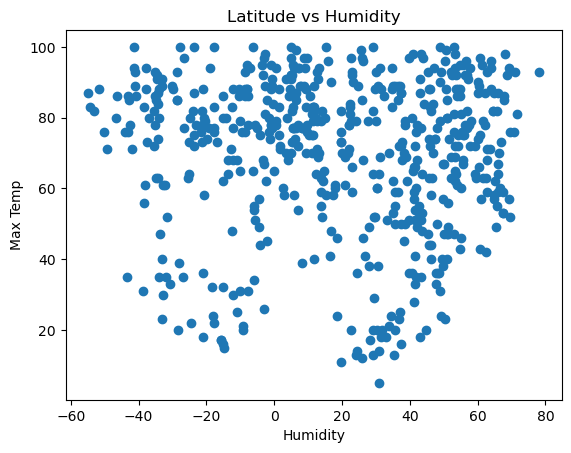

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

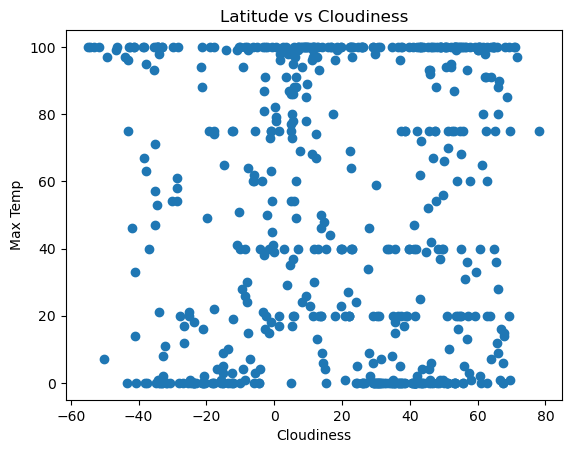

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

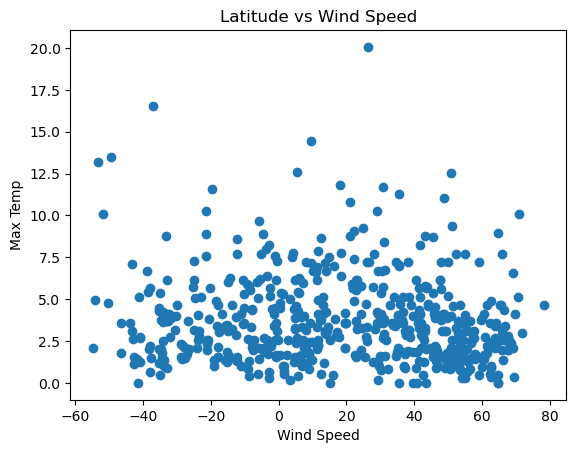

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

def myfunc(x_values):
    return x_values * slope + intercept
    #return regress_values = x_values * slope + intercept

line_eq = list(map(myfunc, x_values))
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
#plt.figure(figsize=(46.82 * .5**(.5 * 6), 33.11 * .5**(.5 * 6)))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.plot(x_values,y_values,line_eq)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs. Max Temp")
print(f"The r-squared is: {rvalue**2}")

plt.show()



                # x_values = san_diego_housing['AveRooms']
                # y_values = san_diego_housing['MEDV']
                # (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
                # regress_values = x_values * slope + intercept
                # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                # plt.scatter(x_values,y_values)
                # plt.plot(x_values,regress_values,"r-")
                # plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
                # plt.xlabel('Rooms in House')
                # plt.ylabel('Median House Prices ($100,000)')
                # print(f"The r-squared is: {rvalue**2}")
                # plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hanover,52.3705,9.7332,18.83,92,75,7.72,DE,1691264530
1,ribeira grande,38.5167,-28.7000,23.76,78,75,3.13,PT,1691264531
3,portland,45.5234,-122.6762,28.12,63,75,1.54,US,1691264359
5,bilibino,68.0546,166.4372,4.19,98,100,2.54,RU,1691264532
7,keflavik,64.0049,-22.5624,12.95,94,100,3.60,IS,1691264532


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,19.62,64,21,7.29,PN,1691264263
4,grytviken,-54.2811,-36.5092,-5.11,83,100,4.98,GS,1691264531
6,waitangi,-43.9535,-176.5597,6.57,76,97,3.58,NZ,1691264266
10,port mathurin,-19.6833,63.4167,22.82,74,49,11.55,MU,1691264287
12,san antonio de pale,-1.4014,5.6325,22.85,76,40,4.12,GQ,1691264533


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3448185539071263


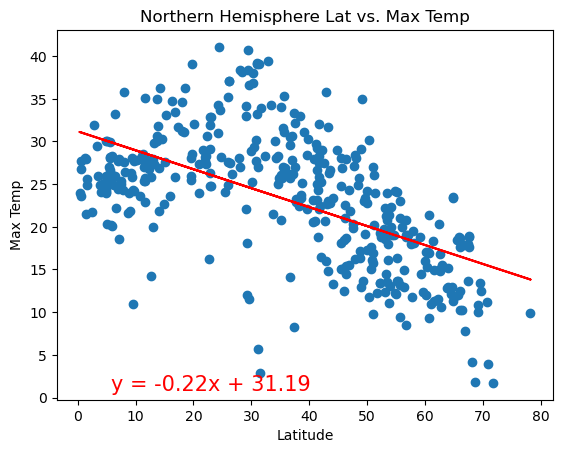

In [37]:
# Linear regression on Northern Hemisphere

# This code modified from Class Exercise Mod 5, Activity 3.8, Ins_Fits_and_Regression



x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs. Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6262648823872857


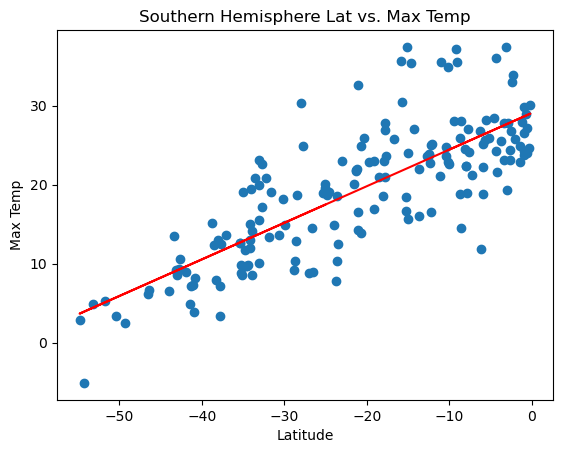

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Lat vs. Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004076183829793206


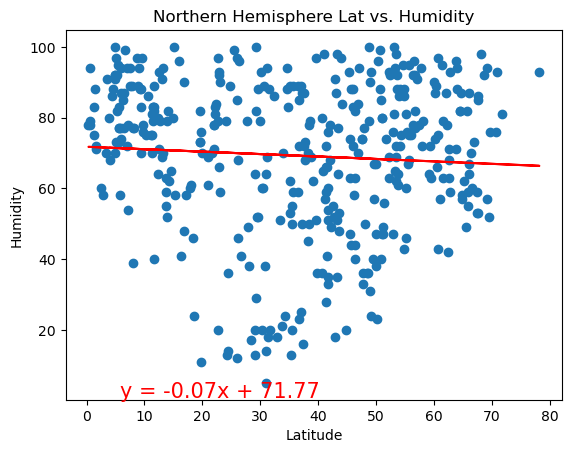

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Lat vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006728152873657327


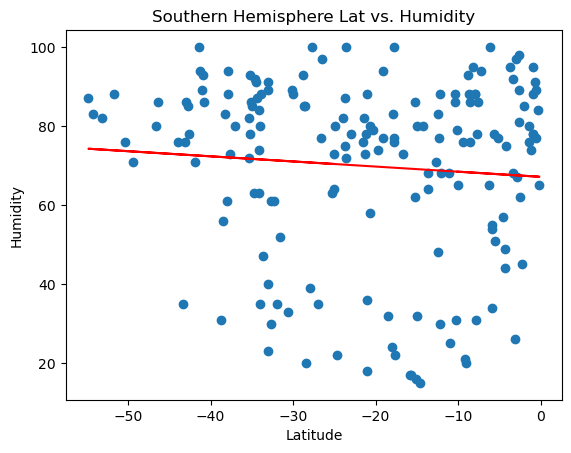

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Lat vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004076183829793206


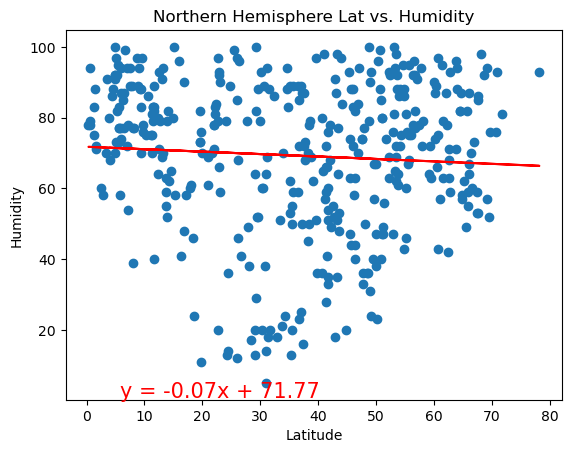

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Lat vs. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.019012353144824364


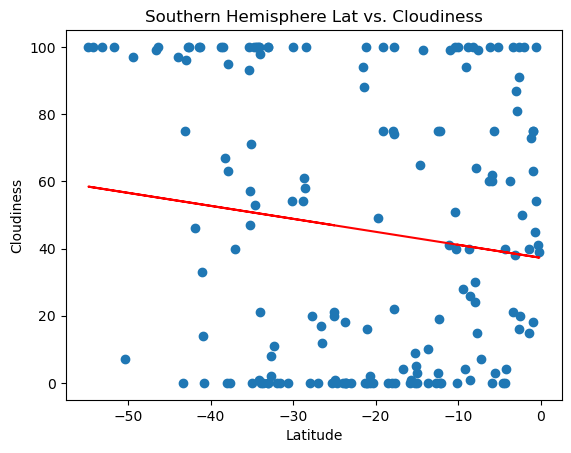

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Lat vs. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.025212007807516885


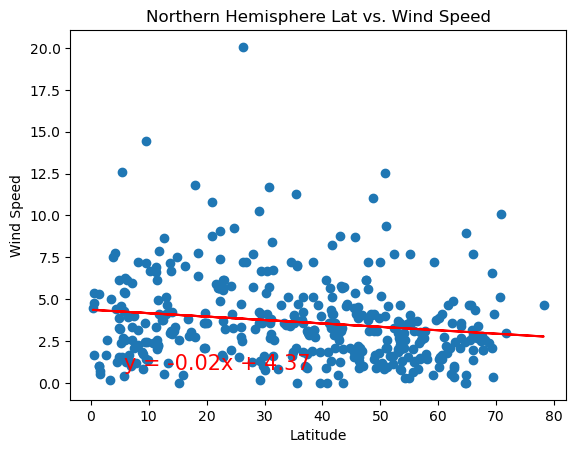

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Lat vs. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0016893243298931372


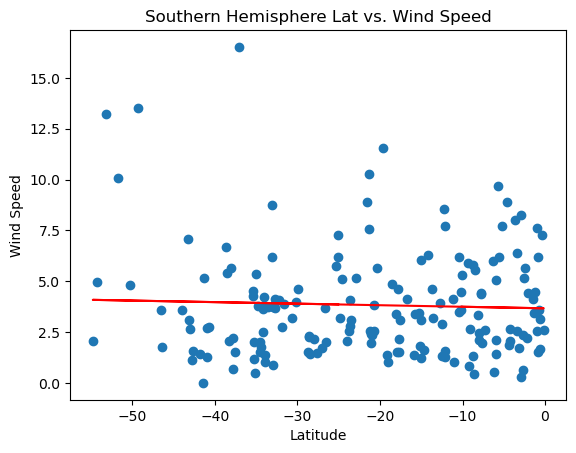

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Lat vs. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE